##  CNN to classify handwritten digits from the MNIST dataset (0–9 digits)

In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# 60,000 training images + 10,000 testing images

# Each image is a 28×28 grayscale digit

# Labels: digits from 0 to 9

### Load and Preprocess Data

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### Build CNN Model

In [13]:
model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # explicit input layer

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits (0–9)
])

### Compile the Model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [7]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8919 - loss: 0.3519 - val_accuracy: 0.9847 - val_loss: 0.0508
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9844 - loss: 0.0512 - val_accuracy: 0.9882 - val_loss: 0.0402
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9909 - loss: 0.0301 - val_accuracy: 0.9900 - val_loss: 0.0367
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.9900 - val_loss: 0.0360
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9945 - loss: 0.0162 - val_accuracy: 0.9905 - val_loss: 0.0418


### Evaluate the Model

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0404
Test Accuracy: 0.9898


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


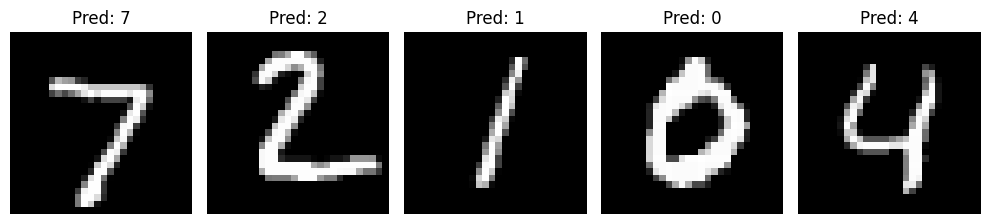

In [9]:
import numpy as np

# Predict on test images
predictions = model.predict(x_test)

# Plot first 5 images with predictions
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# View the softmax probabilities for one sample
print("Predicted probabilities:", predictions[0])
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", y_test[0])


Predicted probabilities: [2.4873736e-07 2.6377809e-06 1.2965570e-07 1.1961583e-06 1.2646015e-10
 1.1057887e-06 5.4071743e-12 9.9995029e-01 2.3296423e-07 4.4145443e-05]
Predicted label: 7
True label: 7


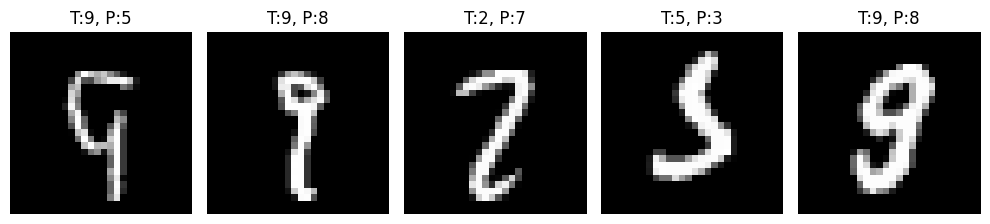

In [12]:
# Make sure this comes right after predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

# Identify incorrect predictions
wrong = np.where(y_pred != y_test)[0]

# Plot some misclassified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(wrong[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_test[idx]}, P:{y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
